In [1]:
############
# This script compares in-situ measurements at stations in the Seyhan basin, Turkey, with measurments extracted 
# those points via CHIRPS 
############

In [2]:
##### load necessary packages 

import json 
import csv
import pandas as pd 
from pandas.io.json import json_normalize
import json
from datetime import datetime
import re
import numpy as np
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from functools import reduce
import pandas as pd
import numpy as np
import pytz
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import date2num
import math
from functools import reduce
import sklearn
from standard_precip.spi import SPI
from standard_precip.utils import plot_index

In [3]:
########## define standard fig size 

# get current size
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
# let's make the plots a bit bigger than the default
# set figure width to 14 and height to 6
fig_size[0] = 14
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)
plt.rcParams['font.size'] = '16'

Current size: [6.0, 4.0]
Current size: [14, 6]


In [11]:
##### list of station names 

#stationlist = ['D18M019', 'D18M018', 'D18M013', 'D18M012', 'D18M011', 'D18M004', 'D18M003', '17981', '17936', '17934', '17906', '17840', '17837', '17802', '17351','06902', '06893', '06560', '06204']

stationlist = ['D18M011', '06902']



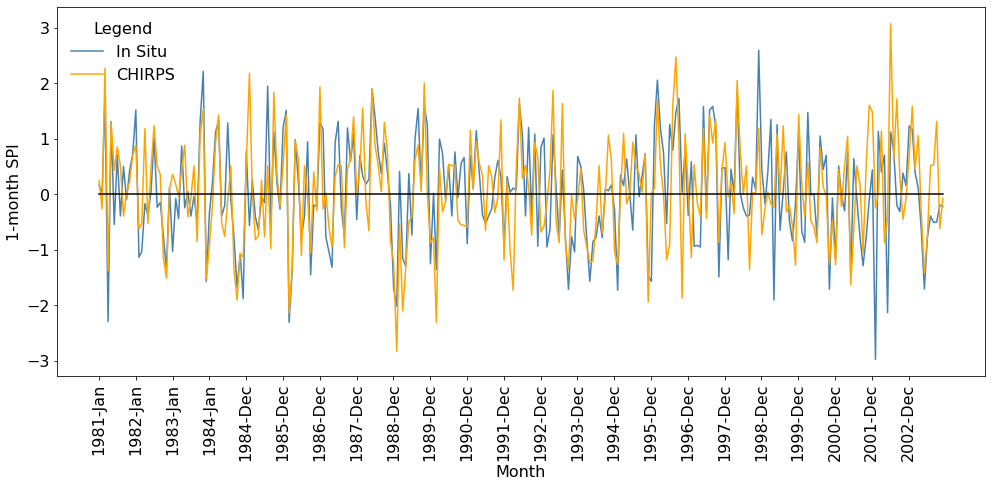

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


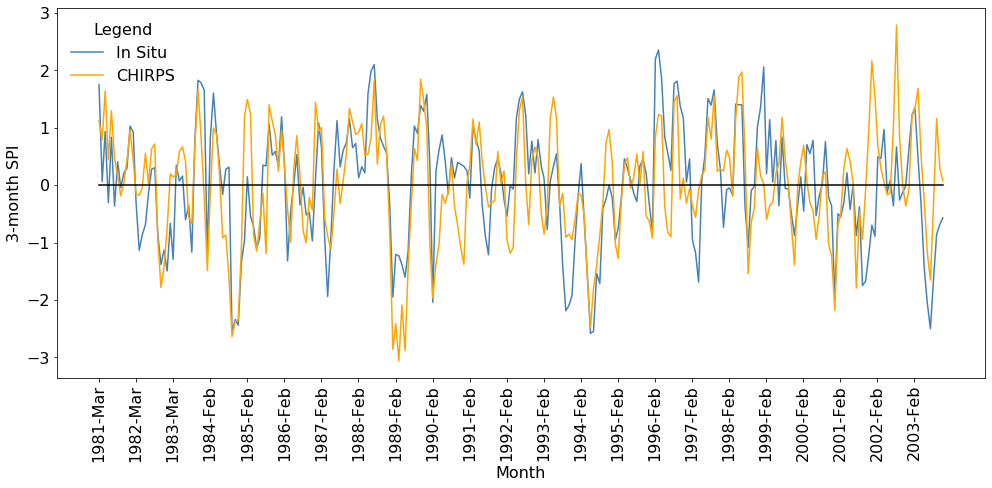

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


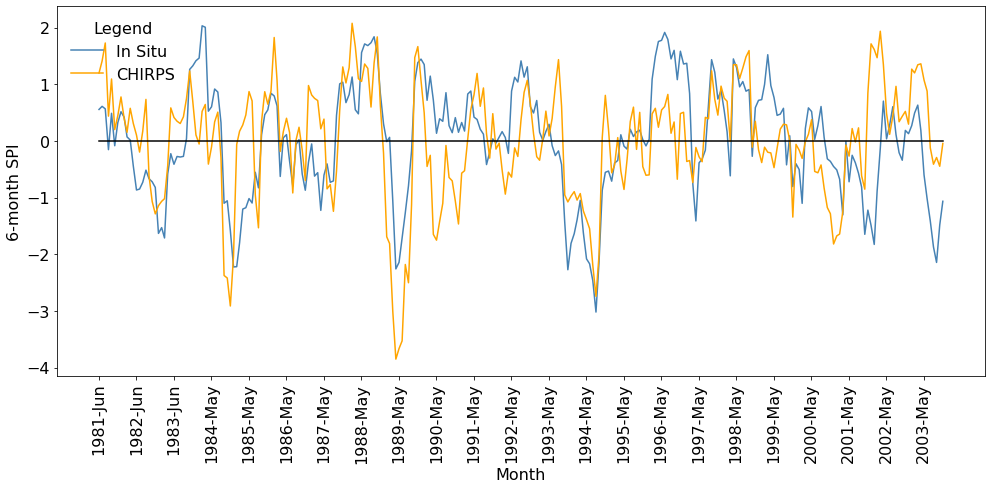

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


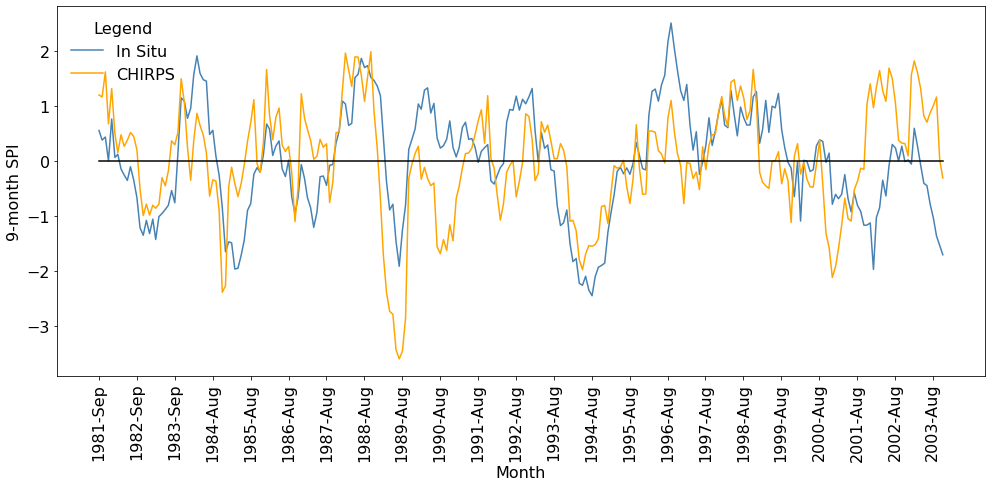

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


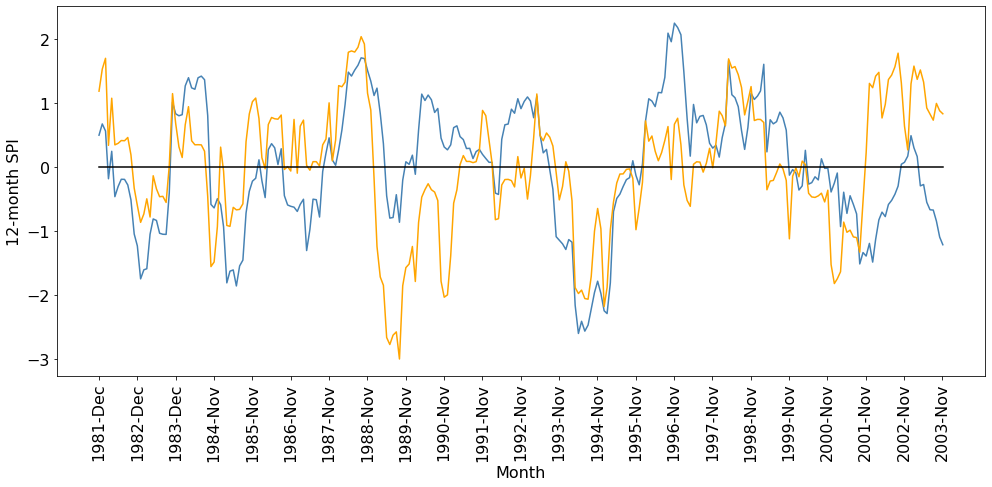

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:628: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


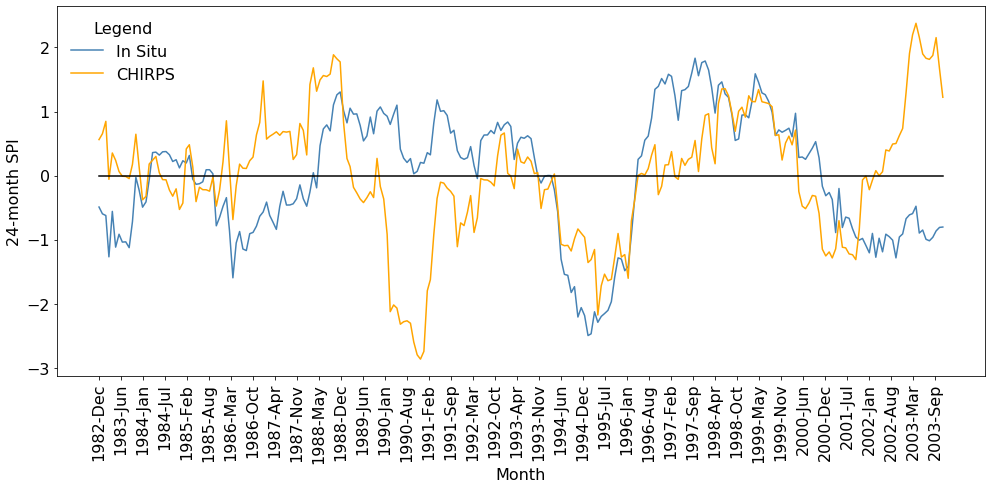

D18M011
done
 


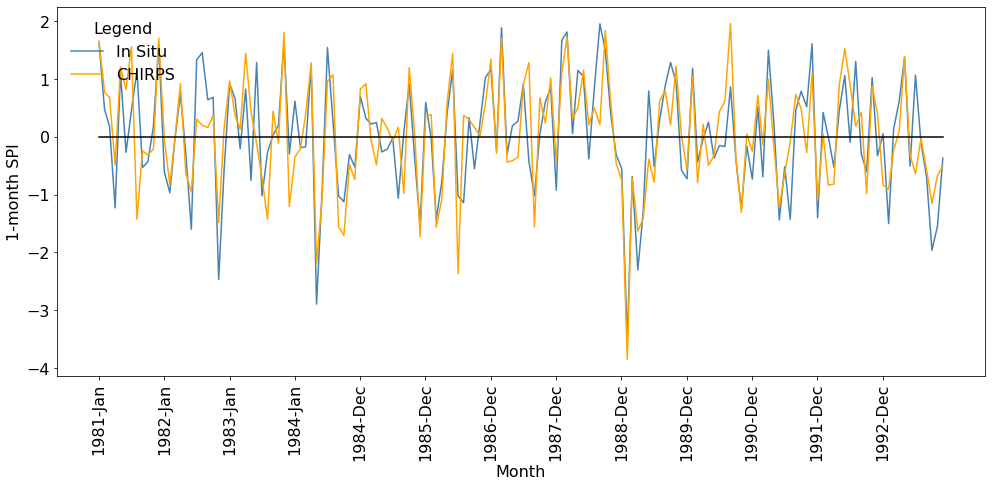

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


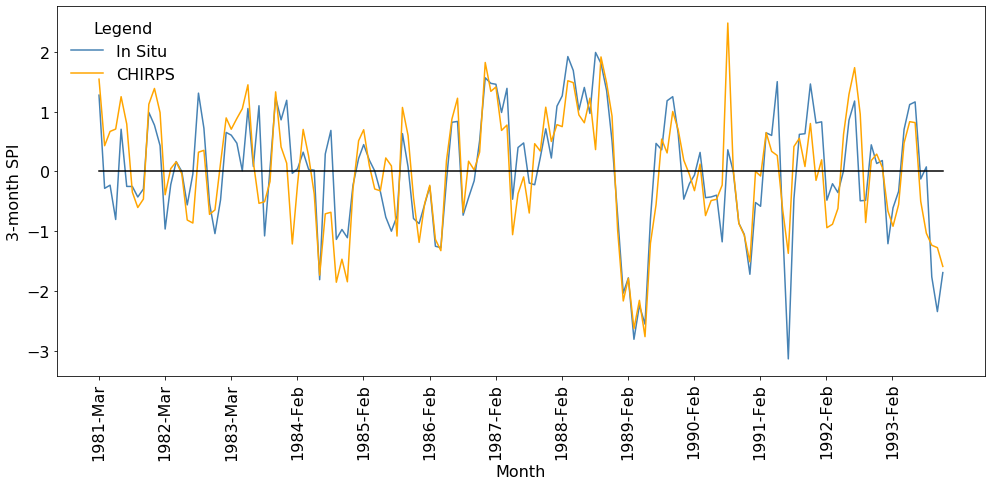

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


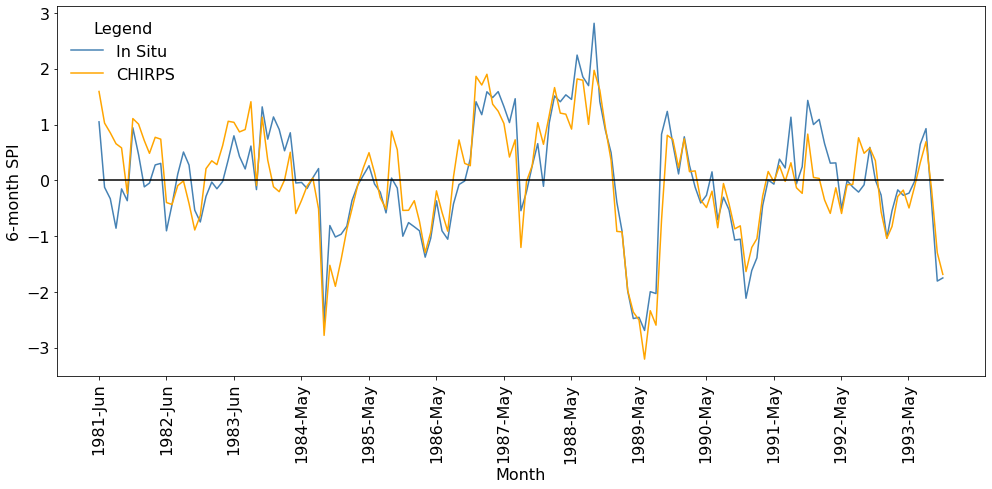

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


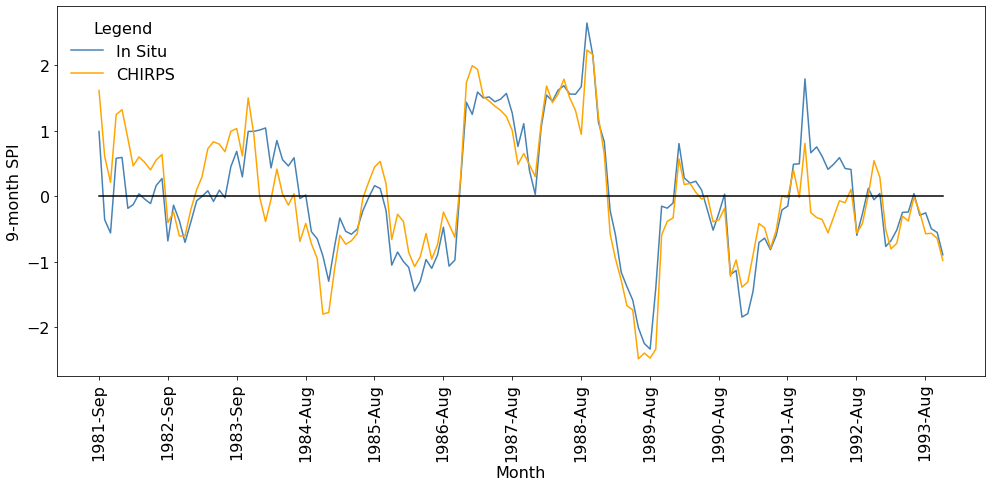

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


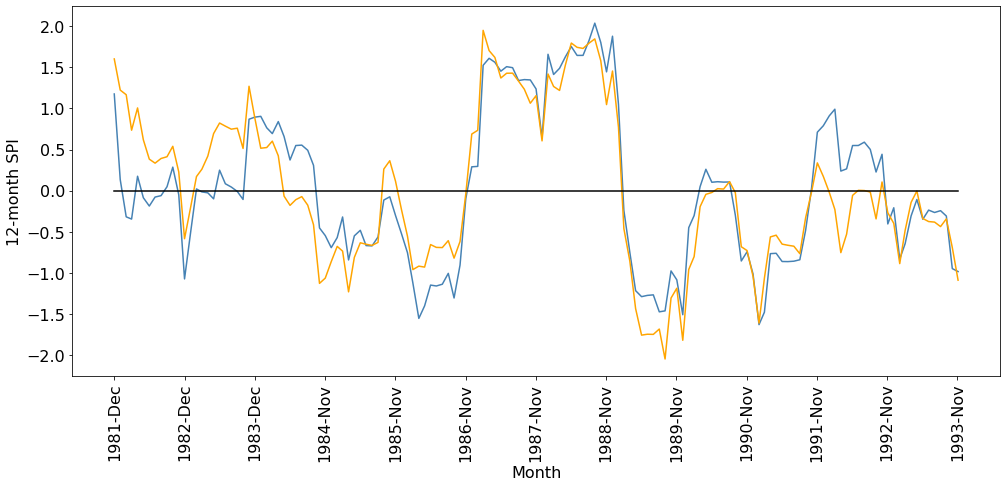

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:628: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


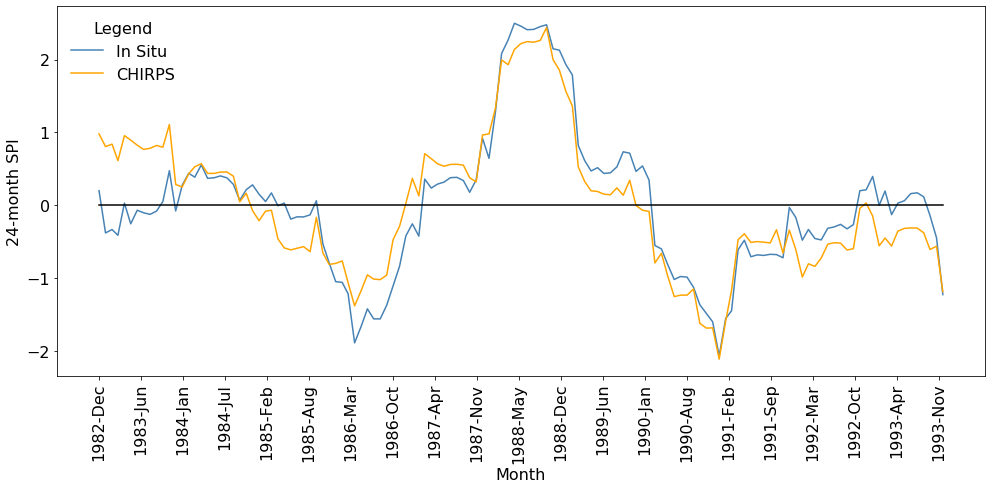

06902
done
 


,station,rmse_spi1,rmse_spi3,rmse_spi6,rmse_spi9,rmse_spi12,rmse_spi24
0,D18M011,0.784535,0.815866,0.962329,1.018590,1.042898,1.190080
1,06902,0.651365,0.598414,0.498462,0.452521,0.437061,0.423811


In [13]:
#############################
## loop to calculate the RMSE between the two series at each station, and to visualize the 
## comparison between monthly and yearly precipitation sums and the overall series 
## saves three figures and three .csv files per station, and a csv file for the overall rmse data 

# define dataframe to which information will be appended for each station 
cols = ['station', 'rmse_spi1', 'rmse_spi3', 'rmse_spi6', 'rmse_spi9', 'rmse_spi12', 'rmse_spi24']
lst = []
df = pd.DataFrame(lst, columns=cols)

for station in stationlist: 
    ## define station name 
    name = str(station)
    
    ## define paths for source files and load 
    path_chirps = 'CHIRPS_Precipitation/'+name+'.csv'
    chirps = pd.read_csv(path_chirps)
    path_insitu = 'In-Situ_Precipitation/'+name+'.csv'
    insitu = pd.read_csv(path_insitu)

    insitu['MONTH'] = insitu['MONTH'].apply(lambda x: '{0:0>2}'.format(x))
    insitu['yearmonth'] = insitu["YEAR"].astype(str) + '-' + insitu["MONTH"].astype(str)
    insitu = insitu.drop(columns=['YEAR', 'MONTH'])
    insitu.columns = ['insitu', 'date']
    max_date = insitu['date'].max()
    min_date = insitu['date'].min()
    insitu = insitu[(insitu['date']>'1980-12')] #### has to be LATER than 1980
    insitu_2 = insitu
    insitu = insitu.set_index('date')
    #insitu.head()

    path_chirps = 'CHIRPS_Precipitation/'+name+'.csv'
    chirps = pd.read_csv(path_chirps)
    chirps = chirps.drop(columns=['system:index','.geo'])
    chirps['date'] = pd.to_datetime(chirps['date'])
    chirps['year'] = chirps['date'].dt.strftime('%Y')#.astype(int).astype(str) 
    chirps['month'] = chirps['date'].dt.strftime('%m')#.astype(int).astype(str) 
    chirps['date'] = chirps['date'].dt.strftime('%Y-%m')
    chirps = chirps[(chirps['date']<= max_date)] ### has to be EARLIER than the latest TS
    chirps = chirps[(chirps['date']>= min_date)] ### has to be LATER than the earliest TS
    chirps['yearmonth'] = chirps["date"]
    chirps = chirps.groupby('yearmonth').agg({'precipitation':['sum'],'date':['first'], 'year':['first'], 'month':['first']})
    chirps.columns = ['chirps', 'date', 'year', 'month']

    precipitation = insitu.merge(chirps, how='inner', left_index=True, right_index=True)
    
    # aggregate by year 
    years = precipitation.groupby('year').agg({'insitu':['sum'],'chirps':['sum']})
    years.columns = ['insitu', 'chirps']
    
    # aggregate by month 
    months = precipitation.groupby('month').agg({'insitu':['mean'],'chirps':['mean']})
    months.columns = ['insitu', 'chirps']
    months = months.round(1)
    

    
    ###################### SPI calculation 
    
    #########################################################################################################

    ##### load Yonca's SPI data

    spi_file_name = 'Yonca_SPI_Data/'+name+'.csv'
    yonca_SPI = pd.read_csv(spi_file_name)
    yonca_SPI["yearmonth"] = yonca_SPI["Year"].astype(str) + '-' + yonca_SPI["Month"].astype(str)
    replace_value = yonca_SPI['SPI24'].iloc[0]
    yonca_SPI = yonca_SPI.replace(replace_value,np.nan)
    yonca_SPI.head()
    #print(replace_value)


    #########################################################################################################

    ####### calculate SPI from CHIRPS 


    rainfall_data = chirps.sort_values('date') 

    spi = SPI()

    #### 1-month 

    df_spi_1 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=1, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_1 = df_spi_1.drop(columns=['chirps'])
    df_spi_1 = df_spi_1.set_index('date')
    df_spi_1.columns = ['SPI1_C']
    #df_spi_1.head()


    #### 3-month

    df_spi_3 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=3, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_3 = df_spi_3.drop(columns=['chirps_scale_3'])
    df_spi_3 = df_spi_3.set_index('date')
    df_spi_3.columns = ['SPI3_C']
    #df_spi_3.head()

    ### 6-months 

    df_spi_6 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=6, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_6 = df_spi_6.drop(columns=['chirps_scale_6'])
    df_spi_6 = df_spi_6.set_index('date')
    df_spi_6.columns = ['SPI6_C']
    #df_spi_6.head(10)

    #### 9-month 

    df_spi_9 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=9, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_9 = df_spi_9.drop(columns=['chirps_scale_9'])
    df_spi_9 = df_spi_9.set_index('date')
    df_spi_9.columns = ['SPI9_C']
    #df_spi_9.head(10)

    ##### 12-month 

    df_spi_12 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=12, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_12 = df_spi_12.drop(columns=['chirps_scale_12'])
    df_spi_12 = df_spi_12.set_index('date')
    df_spi_12.columns = ['SPI12_C']
    #df_spi_12.head(10)

    #### 24-month

    df_spi_24 = spi.calculate(
        rainfall_data, 
        'date', 
        'chirps', 
        freq="M", 
        scale=24, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_24 = df_spi_24.drop(columns=['chirps_scale_24'])
    df_spi_24 = df_spi_24.set_index('date')
    df_spi_24.columns = ['SPI24_C']
    #df_spi_24.head(10)

    spi_indices = df_spi_1.merge(df_spi_3, how='inner', left_index=True, right_index=True).merge(df_spi_6, how='inner', left_index=True, right_index=True).merge(df_spi_9, how='inner', left_index=True, right_index=True).merge(df_spi_12, how='inner', left_index=True, right_index=True).merge(df_spi_24, how='inner', left_index=True, right_index=True)
    spi_indices.head()

    #########################################################################################################

    ### merge the two dataframes 

    #spi_indices['date'] = spi_indices.index

        #########################################################################################################

    ####### calculate SPI from insitu 

    rainfall_data = insitu_2

    spi = SPI()

    #### 1-month 

    df_spi_1 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=1, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_1 = df_spi_1.drop(columns=['insitu'])
    df_spi_1 = df_spi_1.set_index('date')
    df_spi_1.columns = ['SPI1']
    #df_spi_1.head()


    #### 3-month

    df_spi_3 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=3, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_3 = df_spi_3.drop(columns=['insitu_scale_3'])
    df_spi_3 = df_spi_3.set_index('date')
    df_spi_3.columns = ['SPI3']
    #df_spi_3.head()

    ### 6-months 

    df_spi_6 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=6, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_6 = df_spi_6.drop(columns=['insitu_scale_6'])
    df_spi_6 = df_spi_6.set_index('date')
    df_spi_6.columns = ['SPI6']
    #df_spi_6.head(10)

    #### 9-month 

    df_spi_9 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=9, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_9 = df_spi_9.drop(columns=['insitu_scale_9'])
    df_spi_9 = df_spi_9.set_index('date')
    df_spi_9.columns = ['SPI9']
    #df_spi_9.head(10)

    ##### 12-month 

    df_spi_12 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=12, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_12 = df_spi_12.drop(columns=['insitu_scale_12'])
    df_spi_12 = df_spi_12.set_index('date')
    df_spi_12.columns = ['SPI12']
    #df_spi_12.head(10)

    #### 24-month

    df_spi_24 = spi.calculate(
        rainfall_data, 
        'date', 
        'insitu', 
        freq="M", 
        scale=24, 
        fit_type="lmom", 
        dist_type="gam"
    )

    df_spi_24 = df_spi_24.drop(columns=['insitu_scale_24'])
    df_spi_24 = df_spi_24.set_index('date')
    df_spi_24.columns = ['SPI24']
    #df_spi_24.head(10)

    spi_indices_yonca = df_spi_1.merge(df_spi_3, how='inner', left_index=True, right_index=True).merge(df_spi_6, how='inner', left_index=True, right_index=True).merge(df_spi_9, how='inner', left_index=True, right_index=True).merge(df_spi_12, how='inner', left_index=True, right_index=True).merge(df_spi_24, how='inner', left_index=True, right_index=True)
    #spi_indices_yonca =spi_indices_yonca.set_index('date')

    spi_all = spi_indices.merge(spi_indices_yonca, how='outer', right_index=True, left_index=True)
    #spi_all = spi_all.set_index('date')
    #spi_all = spi_all.sort_index()
    spi_all.head()
    ### save the complete file 
    spi_all_filename = figname = 'spi_comparison/SPI1/'+name+'.csv'
    spi_all.to_csv(spi_all_filename)

    #### isolate index pairs for RMSE calculation and graphics 

    spi_all_1 = spi_all.drop(columns=['SPI3', 'SPI3_C', 'SPI6', 'SPI6_C', 'SPI9', 'SPI9_C', 'SPI12', 'SPI12_C', 'SPI24', 'SPI24_C'])#.dropna()
    spi_all_3 = spi_all.drop(columns=['SPI1', 'SPI1_C', 'SPI6', 'SPI6_C', 'SPI9', 'SPI9_C', 'SPI12', 'SPI12_C', 'SPI24', 'SPI24_C'])#.dropna()
    spi_all_6 = spi_all.drop(columns=['SPI3', 'SPI3_C', 'SPI1', 'SPI1_C', 'SPI9', 'SPI9_C', 'SPI12', 'SPI12_C', 'SPI24', 'SPI24_C'])#.dropna()
    spi_all_9 = spi_all.drop(columns=['SPI3', 'SPI3_C', 'SPI6', 'SPI6_C', 'SPI1', 'SPI1_C', 'SPI12', 'SPI12_C', 'SPI24', 'SPI24_C'])#.dropna()
    spi_all_12 = spi_all.drop(columns=['SPI3', 'SPI3_C', 'SPI6', 'SPI6_C', 'SPI9', 'SPI9_C', 'SPI1', 'SPI1_C', 'SPI24', 'SPI24_C'])#.dropna()
    spi_all_24 = spi_all.drop(columns=['SPI3', 'SPI3_C', 'SPI6', 'SPI6_C', 'SPI9', 'SPI9_C', 'SPI12', 'SPI12_C', 'SPI1', 'SPI1_C'])#.dropna()


    #########################################################################################################
    ### plots 
    #########################################################################################################

    #### SPI1 

    

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()

    spi_all_1_full = spi_all_1.dropna()

    spi_all_1_full['baseline'] = 0

    # define axes 
    y1 = spi_all_1_full['SPI1']
    y2 = spi_all_1_full['SPI1_C']
    y3 = spi_all_1_full['baseline']

    x = date2num(pd.to_datetime(spi_all_1_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("1-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,600]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 365.0))

    plt.show()

    figname = 'spi_comparison/SPI1/all_available'+name+'.png'

    fig.savefig(figname, dpi=100)

    mse_spi1 = sklearn.metrics.mean_squared_error(spi_all_1_full['SPI1'], spi_all_1_full['SPI1_C'])

    rmse_spi1 = math.sqrt(mse_spi1)

    #########################################################################################################
    #### SPI 3 

    

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()

    spi_all_3_full = spi_all_3.dropna()

    spi_all_3_full['baseline'] = 0

    # define axes 
    y1 = spi_all_3_full['SPI3']
    y2 = spi_all_3_full['SPI3_C']
    y3 = spi_all_3_full['baseline']

    x = date2num(pd.to_datetime(spi_all_3_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("3-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,600]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 365.0))

    plt.show()

    figname = 'spi_comparison/SPI3/all_available'+name+'.png'

    fig.savefig(figname, dpi=100)

    mse_spi3 = sklearn.metrics.mean_squared_error(spi_all_3_full['SPI3'], spi_all_3_full['SPI3_C'])

    rmse_spi3 = math.sqrt(mse_spi3)

    #########################################################################################################
    #### SPI 6

    

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()

    spi_all_6_full = spi_all_6.dropna()

    spi_all_6_full['baseline'] = 0

    # define axes 
    y1 = spi_all_6_full['SPI6']
    y2 = spi_all_6_full['SPI6_C']
    y3 = spi_all_6_full['baseline']

    x = date2num(pd.to_datetime(spi_all_6_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("6-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,600]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 365.0))

    plt.show()

    figname = 'spi_comparison/SPI6/all_available'+name+'.png'

    fig.savefig(figname, dpi=100)

    mse_spi6 = sklearn.metrics.mean_squared_error(spi_all_6_full['SPI6'], spi_all_6_full['SPI6_C'])

    rmse_spi6 = math.sqrt(mse_spi6)

    #########################################################################################################
    #### SPI 9

   

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()

    spi_all_9_full = spi_all_9.dropna()

    spi_all_9_full['baseline'] = 0

    # define axes 
    y1 = spi_all_9_full['SPI9']
    y2 = spi_all_9_full['SPI9_C']
    y3 = spi_all_9_full['baseline']

    x = date2num(pd.to_datetime(spi_all_9_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("9-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,900]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 365.0))

    plt.show()

    figname = 'spi_comparison/SPI9/all_available'+name+'.png'

    fig.savefig(figname, dpi=100)

    mse_spi9 = sklearn.metrics.mean_squared_error(spi_all_9_full['SPI9'], spi_all_9_full['SPI9_C'])

    rmse_spi9 = math.sqrt(mse_spi9)

    #########################################################################################################
    #### SPI 12

    

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()
    
    spi_all_12_full = spi_all_12.dropna()

    spi_all_12_full['baseline'] = 0

    # define axes 
    y1 = spi_all_12_full['SPI12']
    y2 = spi_all_12_full['SPI12_C']
    y3 = spi_all_12_full['baseline']

    x = date2num(pd.to_datetime(spi_all_12_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    #plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("12-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,3650]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 365.0))

    plt.show()

    figname = 'spi_comparison/SPI12/all_available'+name+'.png'

    fig.savefig(figname, dpi=100, bbox_inches = "tight")

    mse_spi12 = sklearn.metrics.mean_squared_error(spi_all_12_full['SPI12'], spi_all_12_full['SPI12_C'])

    rmse_spi12 = math.sqrt(mse_spi12)

    #########################################################################################################
    #### SPI 24

    

    ### plot the difference over the entire period for which both datasets are available and calculate rmse

    # plot and save graph: comparison of one-month SPI 

    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(14, 6))
    plt.tight_layout()
    spi_all_24_full = spi_all_24.dropna()

    spi_all_24_full['baseline'] = 0

    # define axes 
    y1 = spi_all_24_full['SPI24']
    y2 = spi_all_24_full['SPI24_C']
    y3 = spi_all_24_full['baseline']

    x = date2num(pd.to_datetime(spi_all_24_full.index))

    ax.plot(x, y1, color="steelblue", label="In Situ")
    ax.plot(x, y2, color="orange", label="CHIRPS")
    ax.plot(x, y3, color='black')

    plt.legend(loc="upper left", title="Legend", frameon=False)

    plt.xlabel("Month")
    plt.ylabel("24-month SPI")

    axes = plt.gca()
    #axes.set_xlim(["2020-09-30","2020-11-02"])
    #axes.set_ylim([-2,2400]) 
    #axes.get_yaxis().set_visible(False)
    ax.xaxis_date()

    myFmt = mdates.DateFormatter('%Y-%b')

    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation = 90)

    plt.xticks(np.arange(min(x), max(x)+1, 200))

    plt.show()

    figname = 'spi_comparison/SPI24/all_available'+name+'.png'

    fig.savefig(figname, dpi=100)

    mse_spi24 = sklearn.metrics.mean_squared_error(spi_all_24_full['SPI24'], spi_all_24_full['SPI24_C'])

    rmse_spi24 = math.sqrt(mse_spi24)

    
    
    # print done 
    
    df = df.append(pd.DataFrame({'station': name, 'rmse_spi1': rmse_spi1, 'rmse_spi3': rmse_spi3, 'rmse_spi6': rmse_spi6, 'rmse_spi9': rmse_spi9, 'rmse_spi12': rmse_spi12, 'rmse_spi24': rmse_spi24}, index=[0]), ignore_index=True)
    
    print(name)
    print('done')
    print(' ')

df.to_csv('rainfall_comparison/RMSE.csv')
df.head(20)
    
    



In [ ]:
name = 'D18M019'

## define paths for source files and load 
path_chirps = 'CHIRPS_Precipitation/'+name+'.csv'
chirps = pd.read_csv(path_chirps)
path_insitu = 'In-Situ_Precipitation/'+name+'.csv'
insitu = pd.read_csv(path_insitu)

insitu['MONTH'] = insitu['MONTH'].apply(lambda x: '{0:0>2}'.format(x))
insitu['yearmonth'] = insitu["YEAR"].astype(str) + '-' + insitu["MONTH"].astype(str)
insitu = insitu.drop(columns=['YEAR', 'MONTH'])
insitu.columns = ['insitu', 'date']
max_date = insitu['date'].max()
insitu_2 = insitu[(insitu['date']>'1980-12')]
insitu = insitu.set_index('date')
#insitu.head()

path_chirps = 'CHIRPS_Precipitation/'+name+'.csv'
chirps = pd.read_csv(path_chirps)
chirps = chirps.drop(columns=['system:index','.geo'])
chirps['date'] = pd.to_datetime(chirps['date'])
chirps['year'] = chirps['date'].dt.strftime('%Y')#.astype(int).astype(str) 
chirps['month'] = chirps['date'].dt.strftime('%m')#.astype(int).astype(str) 
chirps['date'] = chirps['date'].dt.strftime('%Y-%m')
chirps = chirps[(chirps['date']<= max_date)]
chirps['yearmonth'] = chirps["date"]
chirps = chirps.groupby('yearmonth').agg({'precipitation':['sum'],'date':['first'], 'year':['first'], 'month':['first']})
chirps.columns = ['chirps', 'date', 'year', 'month']
#chirps.tail()

In [17]:
max_date

'2005-12'

In [11]:
insitu.iloc[-1]

insitu    0.0
Name: 2005-12, dtype: float64